In [97]:
# import libraries

import pandas as pd
import re
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
count= CountVectorizer()
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

nltk.download('stopwords')
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
# read file
df = pd.read_csv('/Users/mac/Downloads/Train.csv')
print(df)

                                                    text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]


In [73]:
df.head(10)

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
5  A terrible movie as everyone has said. What ma...      0
6  Finally watched this shocking movie last night...      1
7  I caught this film on AZN on cable. It sounded...      0
8  It may be the remake of 1987 Autumn's Tale aft...      1
9  My Super Ex Girlfriend turned out to be a plea...      1

In [74]:
df.tail(10)

text  label
39990  I really love anything done by Savage Steve Ho...      1
39991  Revenge is the theme of this Denzel Washington...      1
39992  Although I agree that it's a good but not grea...      1
39993  "The Best Movie of the 90's" "The Welsh Trains...      0
39994  My girlfriend has the habit of going to Blockb...      0
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

In [75]:
# check for duplicates 

print(df.isnull().sum())

text     0
label    0
dtype: int64


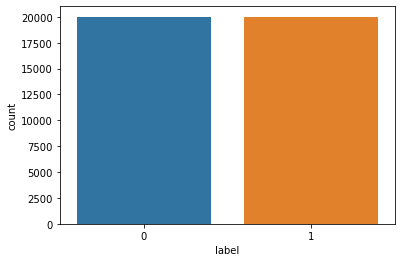

In [76]:
# countplot of labels 


sns.countplot( x = df['label'], data = df)
plt.show()


In [77]:
# preprocress text , remove special characters etc

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text 

In [78]:
df['text'].apply(preprocessor)

0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995     western union is something of a forgotten cla...
39996    this movie is an incredible piece of work it e...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners i was amazed i...
39999    why would this film be so good but only gross ...
Name: text, Length: 40000, dtype: object

In [91]:
def stemmer(text):
    ps = PorterStemmer()
    text =''.join([ps.stem(word) for word in text.split()])
    return text 

df['text'] = df['text'].apply(stemmer)

In [80]:
positive = df[df['label'] == 1]
positive = positive['text']
negative = df[df['label'] == 0 ]
negative = negative['text']

In [81]:
# wordcloud function 
def wd(text):
    words = ''.join(text)
    clean = ''.join([word for word in words.split()
                        if(word!='movie','br' and word!='film')])
    wordcloud = WordCloud(
        width=2500, height=2000 , 
        background_color = 'white',
        stopwords = stop, 
        min_font_size = 10).generate(clean)
    
    # plot wordcloud image
    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.figure(1,figsize=(20,12), facecolor = None )
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    



Positive words


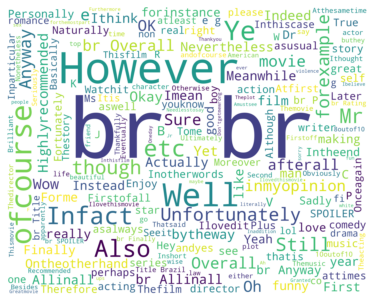

Negative words


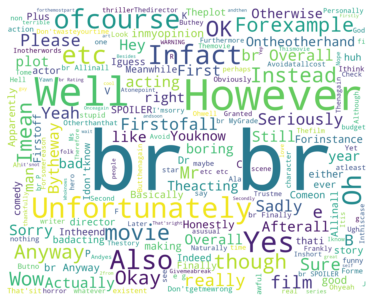

In [82]:
# plot positive and negative words

print('Positive words')
wd(positive)


print('Negative words')
wd(negative)



In [93]:
# term frequency , inverse document frequency
tfidf = TfidfVectorizer(
        strip_accents=None,
        lowercase =False, 
        preprocessor=None,
        tokenizer=stemmer,
        use_idf=True, 
        norm='l2', 
        smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)


In [98]:

clf = LogisticRegressionCV(cv=6,scoring='accuracy', random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(x_train,y_train)

y_pred = clf.predict(x_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

RUNNING THE L-BFGS-B CODE
           * * *


           * * *
RUNNING THE L-BFGS-B CODE

Machine precision = 2.220D-16


           * * *

           * * *


           * * *

Machine precision = 2.220D-16
Machine precision = 2.220D-16
Machine precision = 2.220D-16
Machine precision = 2.220D-16
Machine precision = 2.220D-16
 N =          155     M =           10
 N =          155     M =           10
 N =          155     M =           10
 N =          155     M =           10
 N =          155     M =           10
 N =          155     M =           10


At X0         0 variables are exactly at the bounds

At X0         0 variables are exactly at the bounds
At X0         0 variables are exactly at the bounds




At iterate    0    f=  1.15527D+04    |proj g|=  5.95099D+01

At iterate    0    f=  1.15527D+04    |proj g|=  5.70755D+01
At X0         0 variables are 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.38084387848080437     

At iterate    9    f=  1.09782D+04    |proj g|=  5.57551D+00


ITERATION    10
 LINE SEARCH           0  times; norm of step =    2.5081167251211765E-003

At iterate   22    f=  1.13554D+04    |proj g|=  1.11309D-01

----------------SUBSM entered-----------------



ITERATION    23


----------------SUBSM entered-----------------
----------------exit SUBSM --------------------



----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.57249543364622213     

At iterate   18    f=  1.09778D+04    |proj g|=  1.66986D+01


ITERATION    19

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.7012513210440932     

At iterate    6    f=  1.09873D+04    |proj g|=  5.26929D+00


ITERATION     7

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.




ITERATION    34

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.17337496508314276     

At iterate   34    f=  1.06130D+04    |proj g|=  1.99691D+00


ITERATION    35

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.26591860345243723     

At iterate   24    f=  1.06031D+04    |proj g|=  2.19927D+01
 LINE SEARCH           0  times; norm of step =   0.62665778955583606     


ITERATION    25


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

At iterate   13    f=  1.06244D+04    |proj g|=  4.25290D+01


ITERATION    14

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.32659126163269248     

At iterate   34    f=  1.06152D+04    |proj g

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    8    f=  1.04390D+04    |proj g|=  1.72513D+00


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    1.2999280039186557E-002

At iterate   66    f=  1.06004D+04    |proj g|=  1.34676D+00


ITERATION    67

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.6662567305133378E-002

At iterate   28    f=  1.04266D+04    |proj g|=  1.24768D+00


ITERATION    29

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    7.1991481400562954E-003

At iterate   60    f=  1.06084D+04    |proj g|=  3.72203D+00


ITERATION    61

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.522764

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    2.6919380218728479     

At iterate   17    f=  1.04256D+04    |proj g|=  6.63531D+00
 LINE SEARCH           0  times; norm of step =   0.20006647593608259     



ITERATION    18
At iterate   71    f=  1.04243D+04    |proj g|=  4.00839D+00

----------------SUBSM entered-----------------



ITERATION    72

----------------exit SUBSM --------------------


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          155     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04848D+04    |proj g|=  4.66942D+00


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -7.6800D+01  7.6800D+01
Distance to the stationary point =   1.0000D+00

---------------

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           1  times; norm of step =    1.2740226919179729E-002

At iterate  122    f=  1.04201D+04    |proj g|=  6.82599D-01


ITERATION   123

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.5050717363727736E-002

At iterate  112    f=  1.04228D+04    |proj g|=  8.45431D-01


ITERATION   113
 LINE SEARCH           0  times; norm of step =    3.7769194548732309E-002

----------------SUBSM entered-----------------


At iterate  120    f=  1.04201D+04    |proj g|=  9.70817D-01

----------------exit SUBSM --------------------



ITERATION   121

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.8349913585793449E-002
 LINE SEARCH           0  times; norm of step =    2.7027699453665094E-002

At iterate  173    f=  1.04230D+04    |proj g|=  6.93723D-01


ITERATION   174


------

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    8.2085016791167403E-003

At iterate  224    f=  1.04229D+04    |proj g|=  2.66809D-01


ITERATION   225

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.26370694884766405     

At iterate   51    f=  1.03533D+04    |proj g|=  4.33521D-01


ITERATION    52

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.4769353835133779E-003

At iterate  158    f=  1.04227D+04    |proj g|=  1.12638D-01


ITERATION   159

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.8755206858694936E-003

At iterate  225    f=  1.04229D+04    |proj g|=  4.66170D-01


ITERATION   226

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.11830581537221019     

At iterate   89    f=  1.03587D+04    |proj g|=  3.72017D-01


ITERATION    90

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.88302614256885803     

At iterate   43    f=  1.03611D+04    |proj g|=  1.18950D+01


ITERATION    44

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.36981336692119765     

At iterate   41    f=  1.03567D+04    |proj g|=  4.21785D+00


ITERATION    42

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.10279565980302627     

At iterate   97    f=  1.03489D+04    |proj g|=  1.42151D+00


ITERATION    98

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.22875448569600756     

At iterate  182    f=  1.03581D+04    |proj g|=  9.37176D-01


ITERATION   183

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    5.5197696190407160E-002

At iterate  242    f=  1.03574D+04    |proj g|=  1.37215D+00


ITERATION   243

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.8232921789770860E-002

At iterate  243    f=  1.03574D+04    |proj g|=  1.43117D+00


ITERATION   244

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    2.9561123782889165E-002

At iterate  183    f=  1.03581D+04    |proj g|=  2.35814D-01


ITERATION   184

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =    9.1457957114759195E-002
 LINE SEARCH           1  times; norm of step =   0.11297088155805748     

At iterate  296    f=  1.03473D+04    |proj g|=  2.38151D+00


ITERATION   297


----------------SUBSM entered-----------------

At iterate  242    f=  1.03578D+04    |proj g|=  9.79360D-02

----------------exit SUBSM --------------------



ITERATION   243

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.17846810565195856     
 LINE SEARCH           1  times; norm of step =   0.26903820502013903     

At iterate  100    f=  1.03297D+04    |proj g|=  3.31298D+00


ITERATION   101
 LINE SEARCH           1  times; norm of step =    7.0701766138919486E-002


----------------SUBSM entered-----------------

At iterate  302    f=  1.03572D+04    |proj g|=  4.43737D-01

----------------exit SUBSM --------------------



ITERATION   303

-------

 This problem is unconstrained.


------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    5.3267792877941859E-002

At iterate  330    f=  1.03522D+04    |proj g|=  6.98675D-01


ITERATION   331

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.45991999097719483     

At iterate  116    f=  1.03365D+04    |proj g|=  9.47273D-01


ITERATION   117

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.2194159412962388E-002

At iterate  326    f=  1.03576D+04    |proj g|=  5.12230D-01


ITERATION   327

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.14202501837826800     

At iterate  379    f=  1.03472D+04    |proj g|=  4.38811D-02


ITERATION   380

----------------SU

 This problem is unconstrained.
 This problem is unconstrained.


 LINE SEARCH           1  times; norm of step =    3.7120449622784759E-003

At iterate  381    f=  1.03522D+04    |proj g|=  8.62428D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  155    381    454      1     0     0   8.624D-01   1.035D+04

 X =  0.0000D+00  1.8380D+00 -4.7430D+00 -3.3334D+00 -2.2062D+01 -4.7481D+00
     -1.1301D+00 -5.8411D+00  2.0635D+00  1.1567D-01 -5.3871D+00  3.1119D+00
      1.5385D-01 -3.7338D+00 -5.0842D+00  5.7198D+00  9.4936D-01 -1.0687D+00
     -5.8092D+00 -1.4724D+01 -1.8406D+00  2.3811D+00  8.6559D-02  9.7573D+00
      1.2251D+01  4.2097D+00 -3.0099D+00 -2.1373D+00 -2.3573D+00 -6.982

 This problem is unconstrained.


 LINE SEARCH           0  times; norm of step =   0.50287051989064602     

At iterate  155    f=  1.03358D+04    |proj g|=  1.22766D+00


ITERATION   156

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    4.4288446763413751E-002

At iterate  335    f=  1.03280D+04    |proj g|=  2.21259D+00


ITERATION   336

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.19533320367033968     

At iterate   93    f=  1.03315D+04    |proj g|=  4.62800D+00


ITERATION    94

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.20199104419812020     

At iterate  107    f=  1.03283D+04    |proj g|=  9.09124D-01


ITERATION   108

----------------SUBSM entered-----------------


----------------exit SUBSM ------

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.


1D+00


ITERATION     7

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.7023648494166670E-002

At iterate  288    f=  1.03246D+04    |proj g|=  1.04999D+00


ITERATION   289

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.1014059519116897     

At iterate  159    f=  1.03364D+04    |proj g|=  2.47605D+00


ITERATION   160

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.1917002790820167E-002

At iterate    7    f=  1.03208D+04    |proj g|=  7.78614D-01


ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.6014069820959087E-002

At iterate  289    f=  1.03246D+04    |

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.


proj g|=  3.78741D-01


ITERATION   482

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.12656269633911618     

 LINE SEARCH           0  times; norm of step =    9.3993153932507803E-002
At iterate  350    f=  1.03269D+04    |proj g|=  4.13919D-01

At iterate  375    f=  1.03237D+04    |proj g|=  2.42923D-01


ITERATION   351


ITERATION   376

----------------SUBSM entered-----------------


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    3.8997435871276701E-002

At iterate  389    f=  1.03335D+04    |proj g|=  2.57781D-01


ITERATION   390

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.17467758220522561     

At iterate  351    f=  

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

----------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.4273303578627217     

 LINE SEARCH           1  times; norm of step =   0.10756682983303330     

At iterate  431    f=  1.03263D+04    |proj g|=  2.97283D-01


ITERATION   432

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

At iterate   56    f=  1.03253D+04    |proj g|=  2.55917D-01


ITERATION    57

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0852541555242008     

At iterate  326    f=  1.03339D+04    |proj g|=  2.07530D-01


ITERATION   327

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.34144740567052839     

At iterate  455    f=  1.03232D+04    |proj g|=  5.45757D+00


ITERATI

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.


9D+00


ITERATION   328

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.6496202967246103E-002

At iterate   89    f=  1.03270D+04    |proj g|=  1.23419D+00


ITERATION    90

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0485025689358567     

At iterate  202    f=  1.03228D+04    |proj g|=  2.16685D+00


ITERATION   203

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.24577969041239794     

At iterate   98    f=  1.03160D+04    |proj g|=  1.51051D+00


ITERATION    99

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.8256802834993037E-002

At iterate   81    f=  1.03192D+04    |

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------

 LINE SEARCH           0  times; norm of step =   0.59594637801342509     

At iterate  238    f=  1.03179D+04    |proj g|=  2.17883D+00


ITERATION   239

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.0438072934328203E-002

At iterate  131    f=  1.03249D+04    |proj g|=  4.41146D-01


ITERATION   132

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.23041555103743494     

At iterate  234    f=  1.03260D+04    |proj g|=  3.08108D-01


ITERATION   235

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.44657209961917144     

At iterate  239    f=  1.03179D+04    |proj g|=  1.64634D+00


ITERATION   240

----------------SUBSM entered-----------------


----------------exit SU

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 LINE SEARCH           0  times; norm of step =    2.1554145068633459     

At iterate  409    f=  1.03127D+04    |proj g|=  4.52870D+00


ITERATION   410

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.3518753548752889     

At iterate  292    f=  1.03231D+04    |proj g|=  3.01007D+00


ITERATION   293

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.2677566235392623     

At iterate  368    f=  1.03243D+04    |proj g|=  4.30785D+00


ITERATION   369

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6212707008819545     

At iterate  369    f=  1.03243D+04    |proj g|=  1.15026D+00


ITERATION   370

----------------SUBSM entered-----------------


----------------exit SUBSM ------

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   12.4s remaining:   12.4s
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver

 LINE SEARCH           0  times; norm of step =    1.9815856627484472     

At iterate  489    f=  1.03233D+04    |proj g|=  9.31278D-01


ITERATION   490

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.27967584828812220     

At iterate  409    f=  1.03219D+04    |proj g|=  4.37123D-01


ITERATION   410

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.78012169423051403     

At iterate  490    f=  1.03233D+04    |proj g|=  9.83463D-02


ITERATION   491

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.36435563691457373     

At iterate  410    f=  1.03219D+04    |proj g|=  2.31020D+00


ITERATION   411

----------------SUBSM entered-----------------


----------------exit SUBSM ------

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.8s finished
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          155     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24057D+04    |proj g|=  7.91802D-01

At iterate    1    f=  1.24057D+04    |proj g|=  1.80363D-01

At iterate    2    f=  1.24057D+04    |proj g|=  8.29434D-01

At iterate    3    f=  1.24057D+04    |proj g|=  2.11980D+00

At iterate    4    f=  1.24057D+04    |proj g|=  4.06918D+00

At iterate    5    f=  1.24057D+04    |proj g|=  4.48676D+00

At iterate    6    f=  1.24057D+04    |proj g|=  2.77369D+00

At iterate    7    f=  1.24057D+04    |proj g|=  1.74031D-01

At iterate    8    f=  1.24057D+04    |proj g|=  1.12777D+00

At iterate    9    f=  1.24057D+04    |proj g|=  2.10772D+00

At iterate   10    f=  1.24057D+04    |proj g|=  3.41341D+00

At iterate   11    f=  1.24057D+04    |proj g|=  5.12538D+00

At iterate   12    f=  1.24057D+04    |proj g|=  6.57166D+00

At iterate   13    f=  1.2